In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder

In [15]:
titanic_train = pd.read_csv('titanic-train.csv')
titanic_test = pd.read_csv('titanic-test.csv')
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


In [16]:
print(titanic_train.columns[titanic_train.isna().any()].tolist())
print(titanic_test.columns[titanic_test.isna().any()].tolist())

['Age', 'Cabin', 'Embarked']
['Age', 'Fare', 'Cabin']


In [17]:
titanic_train['Age'] = titanic_train['Age'].fillna(0.0)
titanic_train['Cabin'] = titanic_train['Cabin'].fillna('')
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('')
titanic_test['Age'] = titanic_test['Age'].fillna(0.0)
titanic_test['Cabin'] = titanic_test['Cabin'].fillna('')
titanic_test['Fare'] = titanic_test['Fare'].fillna(0.0)

cat_features_train = titanic_train.select_dtypes(include=['object']).columns.tolist()
cat_features_test = titanic_test.select_dtypes(include=['object']).columns.tolist()
encoder_train = OneHotEncoder(sparse=False)
encoder_test = OneHotEncoder(sparse=False)
encoded_train = encoder_train.fit_transform(titanic_train[cat_features_train])
encoded_test = encoder_test.fit_transform(titanic_test[cat_features_test])
encoded_trained_df = pd.DataFrame(encoded_train, columns=encoder_train.get_feature_names(cat_features_train))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder_test.get_feature_names(cat_features_test))                                     
titanic_train = pd.concat([titanic_train, encoded_trained_df],axis=1)
titanic_train = titanic_train.drop(cat_features_train,axis=1)
titanic_test = pd.concat([titanic_test, encoded_test_df],axis=1)
titanic_test = titanic_test.drop(cat_features_test,axis=1)


C:\Anaconda\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.
C:\Anaconda\envs\PythonAdv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
C:\Anaconda\envs\PythonAdv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice.
C:\Anaconda\envs\PythonAdv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


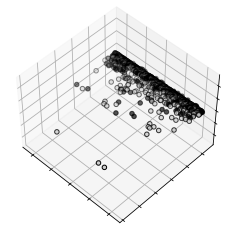

In [22]:
np.random.seed(42)

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(4,3))
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)


X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
for name, label in [('Dead', 0), ('Survived', 1), ('UnKnown', 2)]:
    ax.text3D(X[y==label,0].mean(),
             X[y==label,1].mean(),
             X[y==label,2].mean(),
             name,
             horizontalalignment='center',
             bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
y = np.choose(y, [0,1]).astype(np.float)
ax.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.nipy_spectral,edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()